### Курсовая работа на тему линейная регрессия

Линейная регрессия (условия применимости метода проверить, можно с графиками, 
построить модель, исследовать на статистическую значимость модель ,можно и коэффициенты (самостоятельное изучение), коэффициент детерминации)

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

Изучим линейную регрессию  на основе набора данных жилья в Бостоне

In [3]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [4]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Теперь проверим, есть ли пропущенные значения в данных 

In [5]:
boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Cоздадим матрицу корреляции, которая измеряет линейные отношения между переменными. 

<AxesSubplot:>

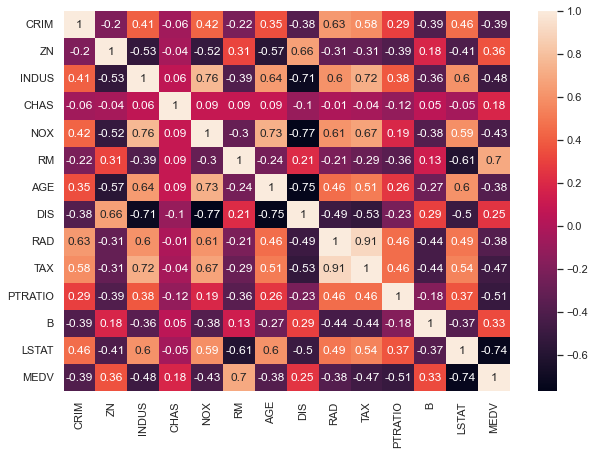

In [6]:
correlation_matrix = boston.corr().round(2)
sns.set (rc={"figure.figsize":( 10 , 7 )})
sns.heatmap(data=correlation_matrix, annot=True)

Чтобы соответствовать модели линейной регрессии, мы выбираем те особенности, которые имеют высокую корреляцию с нашей целевой переменной MEDV. Глядя на матрицу корреляции, мы видим, что RM имеет сильную положительную корреляцию с MEDV(0,7) где как LSTAT имеет высокую отрицательную корреляцию с MEDV(-0,74).

Важным моментом при выборе признаков для модели линейной регрессии является проверка на мультиколлинеарность. Особенности RAD, TAX иметь соотношение 0,91. Эти пары признаков сильно связаны друг с другом. Мы не должны выбирать обе эти признаки вместе для обучения модели. То же самое касается признака DIS а также AGE, которые имеют корреляцию -0,75

### Проверим условия применимости линейной регрессии

### 1. Наличие линейной зависимости между независимой переменной x и зависимой y проверим с помощью графиков

На основе матрицы кореляций выберем признаки, которые хорошо коррелируют с нашей целевой переменной

In [7]:
features = ['LSTAT', 'RM']

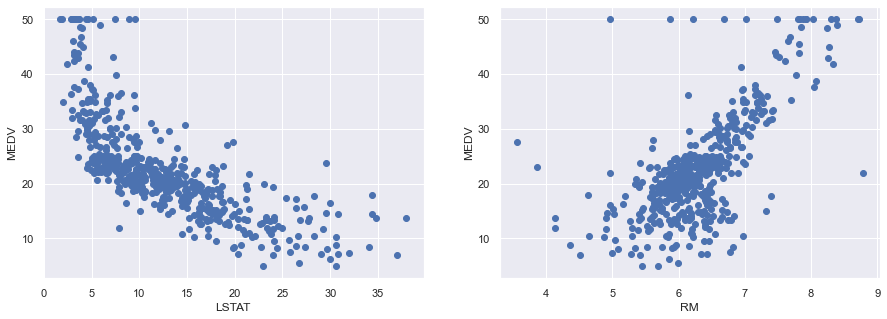

In [8]:
plt.figure(figsize=(15, 5))

for i, col in enumerate(features):
    plt.subplot(1, 2 , i+1)
    x = boston[col]
    y = boston['MEDV']
    plt.scatter(x, y, marker='o')
    #plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

2. Для проверки следующих пунктов, обучим и протестируем модель линейной регрессий

Подготовим данные для обучения модели

In [9]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

Обучение и тестирование модели

In [11]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [12]:
y_test_predict = lin_model.predict(X_test)

In [13]:
df_predict_test = X_test

In [14]:
df_predict_test['predict_MEDV'] = y_test_predict
df_predict_test['real_MEDV'] = Y_test

In [15]:
df_predict_test.head(5)

,LSTAT,RM,predict_MEDV,real_MEDV
173,9.04,6.416,25.505110,23.6
274,3.53,6.758,30.859241,32.4
491,18.07,5.983,17.427260,13.6
72,5.52,6.065,25.813255,22.8
452,17.27,6.297,19.649300,16.1


Найдём коэффициенты

In [34]:
lin_model.coef_

array([-0.63249856,  5.46509877])

In [35]:
lin_model.intercept_

-3.84117707900489

Проверим

In [36]:
9.04 *  lin_model.coef_[0] + 6.416 * lin_model.coef_[1] + lin_model.intercept_

25.50510964217326

Найдём остатки

In [16]:
y_ost = (df_predict_test['predict_MEDV'] - df_predict_test['real_MEDV']).to_numpy()

Считаем метрику RMSE и R2 

In [37]:
from sklearn.metrics import mean_squared_error, r2_score # подгружаем метрику mse и r2

In [40]:
rmse = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2 = r2_score(Y_test, y_test_predict)
print('RMSE:', rmse)
print('R2:', r2)

RMSE: 5.589569804715174
R2: 0.5739577415025858


### 2. Теперь проверим второе условие применимости линейной регрессий: независимость остатков. Проверим с помощью графиков

In [17]:
df_predict_test[['RM', 'LSTAT']].describe()

,RM,LSTAT
count,102.000000,102.000000
mean,6.160833,13.428235
std,0.663825,7.244601
min,3.561000,2.880000
25%,5.870250,7.687500
50%,6.170500,12.335000
75%,6.479250,18.017500
max,8.034000,36.980000


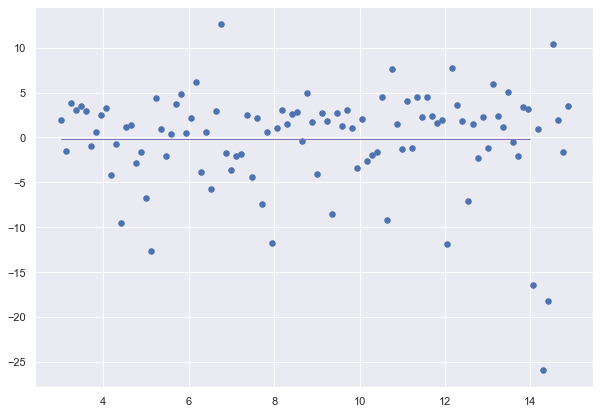

In [18]:
plt.figure(figsize=(10, 7))
line_x = np.arange(3, 15, 1)
line_y = np.array([y_ost.mean()]*len(line_x))
plt.plot(line_x, line_y, color='m', linewidth = 1)
x = np.arange(3, 15, (15 - 3) / len(y_ost)) 
plt.scatter(x, y_ost, s=30);

Видно, что с течением времени остатки не меняются

### 3. Нормальное распределение остатков

Проверим нормальное распределение остатков с помощью теста Шапиро-Уилка


In [19]:
from scipy import stats

In [20]:
stats.shapiro(y_ost)

ShapiroResult(statistic=0.8625265955924988, pvalue=2.7932951951470386e-08)

Вывод: так как p-value намного меньше, чем alpha = 0.05, то этот тест показывает, что остатки распределены ненормально 

### 4. Гомоскедастичность

In [27]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import statsmodels.formula.api as sms

Чтобы выяснить, являются ли остатки гомоскедастичными, мы можем посмотреть график зависимости остатков (или стандартизованных остатков) от прогнозируемых (подогнанных) значений. Что нас должно настораживать, так это случай, когда остатки растут как функция прогнозируемого значения или времени.

Мы можем использовать статистический тест Бреуш-Паган. В этом тесте нулевая гипотеза предполагает гомоскедастичность, а значение p ниже определенного уровня (например, 0,05) указывает на то, что мы должны отвергнуть нолевую гипотезу в пользу гетероскедастичности.

In [28]:
fit_model = sms.ols('real_MEDV ~ LSTAT+RM', data=df_predict_test).fit()


In [31]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sm

In [33]:
names = ['Lagrange multiplier statistic', 'p-value',
 'f-value', 'f p-value']
test = sm.het_breuschpagan(fit_model.resid, fit_model.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 2.0412256506795634),
 ('p-value', 0.3603740261541114),
 ('f-value', 1.010823415616692),
 ('f p-value', 0.3676437222604967)]

В этом примере статистика множителя Лагранжа для теста равна 6,004 , а соответствующее значение p равно 0,1114.Поскольку это p-значение не меньше 0,05, мы не можем отвергнуть нулевую гипотезу. 

#### Вывод: на основе полученных данных в ходе проверок всех четырёх тестов мы нем можем с полной достоверностью применять линейную регрессию на этом датасете,так как третйй тест Шапира-Уйлка на нормальность не прошёл и метрики RMSE и R2 получились не очень хорошие  